# Create Subimages and Test/Train-Split

## create subimages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread,imsave

In [40]:
# create lists of filenames of all cleaned rain and nor rain images
from os import listdir
from os.path import isfile, join
mypath="./RainImages_Ready"
rainfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
mypath="./NoRainImages_Ready"
norainfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [38]:
# create two subimages and cut off trees (bottom) and buildung(left)
# loop trough the lists of filenames
# case rain images
for item in rainfiles:
    image=plt.imread("./RainImages_Ready/"+item)
    image=image[:600,350:,:]
    sub1=image[:,:800,:]
    sub2=image[:,800:1600,:]
    imsave("./rain_two_subimages/"+item[:-4]+f"_01.jpg",sub1)
    imsave("./rain_two_subimages/"+item[:-4]+f"_02.jpg",sub2)
    

In [43]:
# create two subimages and cut off trees (bottom) and buildung(left)
# loop trough the lists of filenames
# case NO rain images
for item in norainfiles:
    try:
        image=plt.imread("./NoRainImages_Ready/"+item)
        image=image[:600,350:,:]
        sub1=image[:,:800,:]
        sub2=image[:,800:1600,:]
        imsave("./norain_two_subimages/"+item[:-4]+f"_01.jpg",sub1)
        imsave("./norain_two_subimages/"+item[:-4]+f"_02.jpg",sub2)
    except:
        pass

## create test train split

In [2]:
## Create Test/Train Split

# create lists of filenames of all cleaned SUB rain and SUB no rain images
import os
mypath="./norain_two_subimages"
rainfilessub = os.listdir('./rain_two_subimages')
mypath="./rain_two_subimages"
norainfilessub = os.listdir('./norain_two_subimages')

In [3]:
import random
random.shuffle(rainfilessub)
random.shuffle(norainfilessub)


In [38]:
norainfilessub

['2019_11_08_1430_01.jpg',
 '2022_08_03_1340_02.jpg',
 '2022_03_15_1340_02.jpg',
 '2022_05_31_0700_01.jpg',
 '2022_07_14_1740_01.jpg',
 '2022_09_27_0835_02.jpg',
 '2020_07_06_1145_02.jpg',
 '2021_09_26_1220_02.jpg',
 '2022_02_24_0840_01.jpg',
 '2018_08_07_1315_02.jpg',
 '2021_03_24_1630_02.jpg',
 '2022_03_27_1740_02.jpg',
 '2022_08_02_1510_02.jpg',
 '2021_04_05_1430_02.jpg',
 '2019_09_13_1740_02.jpg',
 '2020_04_27_0650_02.jpg',
 '2019_06_20_1430_01.jpg',
 '2021_12_01_1300_02.jpg',
 '2020_10_03_1300_01.jpg',
 '2018_07_17_1100_01.jpg',
 '2022_03_31_1630_02.jpg',
 '2022_05_15_0940_02.jpg',
 '2020_02_11_1130_01.jpg',
 '2022_02_20_0955_01.jpg',
 '2022_05_12_1550_01.jpg',
 '2021_07_20_1550_01.jpg',
 '2020_01_21_1120_02.jpg',
 '2020_01_14_1300_02.jpg',
 '2022_06_27_0615_02.jpg',
 '2018_09_19_1350_02.jpg',
 '2022_07_15_1615_01.jpg',
 '2019_08_16_1715_01.jpg',
 '2020_08_09_1930_02.jpg',
 '2022_03_06_1605_02.jpg',
 '2021_11_03_0900_02.jpg',
 '2021_10_04_1410_02.jpg',
 '2022_05_18_1125_02.jpg',
 

In [43]:
# create test train set
import shutil
from google.cloud import storage
BUCKET_NAME='le-wagon-project'

len_rain=len(rainfilessub)
len_norain=len(norainfilessub)

client = storage.Client()
bucket = client.bucket(BUCKET_NAME)

# rain set
k=0
for item in rainfilessub[:int(0.7*len_rain)]:
    shutil.copyfile("./rain_two_subimages/"+item, "./train/rain/"+item)
    blob = bucket.blob("/train/rain/"+item)
    blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[:int(0.7*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
k=0
for item in rainfilessub[int(0.7*len_rain):]:
    shutil.copyfile("./rain_two_subimages/"+item, "./test/rain/"+item)
    blob = bucket.blob("/test/rain/"+item)
    blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[:int(0.7*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

# no rain set
k=0
for item in norainfilessub[:int(0.7*len_norain)]:
    shutil.copyfile("./norain_two_subimages/"+item, "./train/norain/"+item)
    blob = bucket.blob("/train/norain/"+item)
    blob.upload_from_filename("./norain_two_subimages/"+item)
    print(f"{100*(k)/len(norainfilessub[:int(0.7*len_norain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
k=0
for item in norainfilessub[int(0.7*len_norain):]:
    shutil.copyfile("./norain_two_subimages/"+item, "./test/norain/"+item)
    blob = bucket.blob("/test/norain/"+item)
    blob.upload_from_filename("./norain_two_subimages/"+item)  
    print(f"{100*(k)/len(norainfilessub[:int(0.7*len_norain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

In [45]:
# create test train VAL set
import shutil
from google.cloud import storage
BUCKET_NAME='le-wagon-project'

len_rain=len(rainfilessub)
len_norain=len(norainfilessub)

client = storage.Client()
bucket = client.bucket(BUCKET_NAME)

# rain set
k=0
for item in rainfilessub[:int(0.5*len_rain)]:
    shutil.copyfile("./rain_two_subimages/"+item, "./dataset_val/train/rain/"+item)
    blob = bucket.blob("dataset_val/train/rain/"+item)
    blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[:int(0.5*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in rainfilessub[int(0.5*len_rain):int(0.7*len_rain)]:
    shutil.copyfile("./rain_two_subimages/"+item, "./dataset_val/val/rain/"+item)
    blob = bucket.blob("dataset_val/val/rain/"+item)
    blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[int(0.5*len_rain):int(0.7*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

k=0
for item in rainfilessub[int(0.7*len_rain):]:
    shutil.copyfile("./rain_two_subimages/"+item, "./dataset_val/test/rain/"+item)
    blob = bucket.blob("dataset_val/test/rain/"+item)
    blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[int(0.7*len_rain):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

# no rain set
k=0
for item in norainfilessub[:int(0.5*len_norain)]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_val/train/norain/"+item)
    blob = bucket.blob("dataset_val/train/norain/"+item)
    blob.upload_from_filename("./norain_two_subimages/"+item)
    print(f"{100*(k)/len(norainfilessub[:int(0.5*len_norain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in norainfilessub[int(0.5*len_norain):int(0.7*len_norain)]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_val/val/norain/"+item)
    blob = bucket.blob("dataset_val/val/norain/"+item)
    blob.upload_from_filename("./norain_two_subimages/"+item)
    print(f"{100*(k)/len(norainfilessub[int(0.5*len_norain):int(0.7*len_norain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in norainfilessub[int(0.7*len_norain):]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_val/test/norain/"+item)
    blob = bucket.blob("dataset_val/test/norain/"+item)
    blob.upload_from_filename("./norain_two_subimages/"+item)  
    print(f"{100*(k)/len(norainfilessub[int(0.7*len_norain):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

In [4]:
# create test train VAL set with smaller Validation set
import shutil
from google.cloud import storage
BUCKET_NAME='le-wagon-project'

len_rain=len(rainfilessub)
len_norain=len(norainfilessub)

client = storage.Client()
bucket = client.bucket(BUCKET_NAME)

# rain set
k=0
for item in rainfilessub[:int(0.6*len_rain)]:
    shutil.copyfile("./rain_two_subimages/"+item, "./dataset_val_new/train/rain/"+item)
    blob = bucket.blob("dataset_val_new/train/rain/"+item)
    blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[:int(0.6*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in rainfilessub[int(0.6*len_rain):int(0.7*len_rain)]:
    shutil.copyfile("./rain_two_subimages/"+item, "./dataset_val_new/val/rain/"+item)
    blob = bucket.blob("dataset_val_new/val/rain/"+item)
    blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[int(0.6*len_rain):int(0.7*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

k=0
for item in rainfilessub[int(0.7*len_rain):]:
    shutil.copyfile("./rain_two_subimages/"+item, "./dataset_val_new/test/rain/"+item)
    blob = bucket.blob("dataset_val_new/test/rain/"+item)
    blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[int(0.7*len_rain):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

# no rain set
k=0
for item in norainfilessub[:int(0.6*len_norain)]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_val_new/train/norain/"+item)
    blob = bucket.blob("dataset_val_new/train/norain/"+item)
    blob.upload_from_filename("./norain_two_subimages/"+item)
    print(f"{100*(k)/len(norainfilessub[:int(0.6*len_norain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in norainfilessub[int(0.6*len_norain):int(0.7*len_norain)]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_val_new/val/norain/"+item)
    blob = bucket.blob("dataset_val_new/val/norain/"+item)
    blob.upload_from_filename("./norain_two_subimages/"+item)
    print(f"{100*(k)/len(norainfilessub[int(0.6*len_norain):int(0.7*len_norain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in norainfilessub[int(0.7*len_norain):]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_val_new/test/norain/"+item)
    blob = bucket.blob("dataset_val_new/test/norain/"+item)
    blob.upload_from_filename("./norain_two_subimages/"+item)  
    print(f"{100*(k)/len(norainfilessub[int(0.7*len_norain):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

In [12]:
# create test train VAL set with smaller Validation set and half of the dataset
import shutil
from google.cloud import storage
BUCKET_NAME='le-wagon-project'

len_rain=len(rainfilessub)
len_norain=len(norainfilessub)

client = storage.Client()
bucket = client.bucket(BUCKET_NAME)

# rain set
k=0
for item in rainfilessub[:int(0.6*len_rain):2]:
    shutil.copyfile("./rain_two_subimages/"+item, "./dataset_val_new_half/train/rain/"+item)
    blob = bucket.blob("dataset_val_new_half/train/rain/"+item)
    blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[:int(0.6*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in rainfilessub[int(0.6*len_rain):int(0.7*len_rain):2]:
    shutil.copyfile("./rain_two_subimages/"+item, "./dataset_val_new_half/val/rain/"+item)
    blob = bucket.blob("dataset_val_new_half/val/rain/"+item)
    blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[int(0.6*len_rain):int(0.7*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

k=0
for item in rainfilessub[int(0.7*len_rain)::2]:
    shutil.copyfile("./rain_two_subimages/"+item, "./dataset_val_new_half/test/rain/"+item)
    blob = bucket.blob("dataset_val_new_half/test/rain/"+item)
    blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[int(0.7*len_rain):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

# no rain set
k=0
for item in norainfilessub[:int(0.6*len_norain):2]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_val_new_half/train/norain/"+item)
    blob = bucket.blob("dataset_val_new_half/train/norain/"+item)
    blob.upload_from_filename("./norain_two_subimages/"+item)
    print(f"{100*(k)/len(norainfilessub[:int(0.6*len_norain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in norainfilessub[int(0.6*len_norain):int(0.7*len_norain):2]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_val_new_half/val/norain/"+item)
    blob = bucket.blob("dataset_val_new_half/val/norain/"+item)
    blob.upload_from_filename("./norain_two_subimages/"+item)
    print(f"{100*(k)/len(norainfilessub[int(0.6*len_norain):int(0.7*len_norain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in norainfilessub[int(0.7*len_norain)::2]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_val_new_half/test/norain/"+item)
    blob = bucket.blob("dataset_val_new_half/test/norain/"+item)
    blob.upload_from_filename("./norain_two_subimages/"+item)  
    print(f"{100*(k)/len(norainfilessub[int(0.7*len_norain):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

In [29]:
!mkdir dataset_balanced_big
!mkdir dataset_balanced_big/train
!mkdir dataset_balanced_big/test
!mkdir dataset_balanced_big/val

!mkdir dataset_balanced_big/train/rain
!mkdir dataset_balanced_big/test/rain
!mkdir dataset_balanced_big/val/rain

!mkdir dataset_balanced_big/train/norain
!mkdir dataset_balanced_big/test/norain
!mkdir dataset_balanced_big/val/norain

In [26]:
rainfilessub = os.listdir('./rain_two_subimages_normalflipmirror')
norainfilessub = os.listdir('./norain_two_subimages')

In [27]:
import random
random.shuffle(rainfilessub)
random.shuffle(norainfilessub)

In [30]:
# create test train VAL set with 80%/10%/10% train,test,val-split and half of the dataset
import shutil
from google.cloud import storage
BUCKET_NAME='le-wagon-project'

len_rain=len(rainfilessub)
len_norain=len(norainfilessub)

client = storage.Client()
bucket = client.bucket(BUCKET_NAME)

# rain set
k=0
for item in rainfilessub[:int(0.8*len_rain)]:
    shutil.copyfile("./rain_two_subimages_normalflipmirror/"+item, "./dataset_balanced_big/train/rain/"+item)
    #blob = bucket.blob("dataset_val_new_half/train/rain/"+item)
    #blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[:int(0.8*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in rainfilessub[int(0.8*len_rain):int(0.9*len_rain)]:
    shutil.copyfile("./rain_two_subimages_normalflipmirror/"+item, "./dataset_balanced_big/val/rain/"+item)
    #blob = bucket.blob("dataset_val_new_half/val/rain/"+item)
    #blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[int(0.8*len_rain):int(0.9*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

k=0
for item in rainfilessub[int(0.9*len_rain):]:
    shutil.copyfile("./rain_two_subimages_normalflipmirror/"+item, "./dataset_balanced_big/test/rain/"+item)
    #blob = bucket.blob("dataset_val_new_half/test/rain/"+item)
    #blob.upload_from_filename("./rain_two_subimages/"+item)
    print(f"{100*(k)/len(rainfilessub[int(0.9*len_rain):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

# no rain set
k=0
for item in norainfilessub[:int(0.8*len_norain)]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_balanced_big/train/norain/"+item)
    #blob = bucket.blob("dataset_val_new_half/train/norain/"+item)
    #blob.upload_from_filename("./norain_two_subimages/"+item)
    print(f"{100*(k)/len(norainfilessub[:int(0.8*len_norain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in norainfilessub[int(0.8*len_norain):int(0.9*len_norain)]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_balanced_big/val/norain/"+item)
    #blob = bucket.blob("dataset_val_new_half/val/norain/"+item)
    #blob.upload_from_filename("./norain_two_subimages/"+item)
    print(f"{100*(k)/len(norainfilessub[int(0.8*len_norain):int(0.9*len_norain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in norainfilessub[int(0.9*len_norain):]:
    shutil.copyfile("./norain_two_subimages/"+item, "./dataset_balanced_big/test/norain/"+item)
    #blob = bucket.blob("dataset_val_new_half/test/norain/"+item)
    #blob.upload_from_filename("./norain_two_subimages/"+item)  
    print(f"{100*(k)/len(norainfilessub[int(0.9*len_norain):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

In [23]:
from PIL import Image, ImageOps
!mkdir rain_two_subimages_mirror

for item in rainfilessub:
    im = Image.open("./rain_two_subimages/"+item)
    im_mirror = ImageOps.mirror(im)
    im_mirror.save("./rain_two_subimages_mirror/"+item[:-4]+"_m.jpg")


In [24]:
from PIL import Image, ImageOps
!mkdir rain_two_subimages_flip

for item in rainfilessub:
    im = Image.open("./rain_two_subimages/"+item)
    im_mirror = ImageOps.flip(im)
    im_mirror.save("./rain_two_subimages_flip/"+item[:-4]+"_f.jpg")

In [20]:
# extract images for multiclass
import os
cleardir='./Multiclass/clear/'
cloudydir='./Multiclass/cloudy/'
partlycloudydir='./Multiclass/partlycloudy/'
raindir='./Multiclass/rain/'

clearfiles = os.listdir(cleardir)
cloudyfiles = os.listdir(cloudydir)
partlycloudyfiles = os.listdir(partlycloudydir)
rainfiles = os.listdir(raindir)

In [15]:
from PIL import Image, ImageOps
!mkdir "./Multiclass/clearmirrorflip/"

for item in clearfiles:
    im = Image.open(cleardir+item)
    im_mirror = ImageOps.mirror(im)
    im_mirror.save("./Multiclass/clearmirrorflip/"+item[:-4]+"_m.jpg")
    
for item in clearfiles:
    im = Image.open(cleardir+item)
    im_flip = ImageOps.flip(im)
    im_flip.save("./Multiclass/clearmirrorflip/"+item[:-4]+"_f.jpg")

mkdir: cannot create directory ‘./Multiclass/clearmirrorflip/’: File exists


In [21]:
from PIL import Image, ImageOps
!mkdir "./Multiclass/cloudymirrorflip/"

for item in cloudyfiles:
    im = Image.open(cloudydir+item)
    im_mirror = ImageOps.mirror(im)
    im_mirror.save("./Multiclass/cloudymirrorflip/"+item[:-4]+"_m.jpg")
    
#for item in cloudyfiles:
#    im = Image.open(cloudydir+item)
#    im_flip = ImageOps.flip(im)
#    im_flip.save("./Multiclass/cloudymirrorflip/"+item[:-4]+"_f.jpg")

In [19]:
from PIL import Image, ImageOps
!mkdir "./Multiclass/partlycloudymirrorflip/"

for item in partlycloudyfiles:
    im = Image.open(partlycloudydir+item)
    im_mirror = ImageOps.mirror(im)
    im_mirror.save("./Multiclass/partlycloudymirrorflip/"+item[:-4]+"_m.jpg")
    
for item in partlycloudyfiles:
    im = Image.open(partlycloudydir+item)
    im_flip = ImageOps.flip(im)
    im_flip.save("./Multiclass/partlycloudymirrorflip/"+item[:-4]+"_f.jpg")

In [22]:
import random
import shutil
random.shuffle(rainfiles)
!mkdir "./Multiclass/rainready/"
for index,item in enumerate(rainfiles):
    if (index+1)%3!=0:
        shutil.copyfile("./Multiclass/rain/"+item, "./Multiclass/rainready/"+item)
        

In [4]:
# create test train VAL set
import os
import random

cleardir='./Multiclass/dataset_multi_before_split/clear/'
cloudydir='./Multiclass/dataset_multi_before_split/cloudy/'
partlycloudydir='./Multiclass/dataset_multi_before_split/partlycloudy/'
raindir='./Multiclass/dataset_multi_before_split/rain/'

clearfiles = os.listdir(cleardir)
cloudyfiles = os.listdir(cloudydir)
partlycloudyfiles = os.listdir(partlycloudydir)
rainfiles = os.listdir(raindir)

random.shuffle(clearfiles)
random.shuffle(cloudyfiles)
random.shuffle(partlycloudyfiles)
random.shuffle(rainfiles)

import shutil

len_clear=len(clearfiles)
len_cloudy=len(cloudyfiles)
len_partlycloudy=len(partlycloudyfiles)
len_rain=len(rainfiles)

In [8]:
len_rain

5964

In [9]:
# %%
# rain set
k=0
for item in rainfiles[:int(0.8*len_rain)]:
    shutil.copyfile(raindir+item, "./dataset_multi/train/rain/"+item)
    print(f"{100*(k)/len(rainfiles[:int(0.5*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in rainfiles[int(0.8*len_rain):int(0.9*len_rain)]:
    shutil.copyfile(raindir+item, "./dataset_multi/val/rain/"+item)
    print(f"{100*(k)/len(rainfiles[int(0.5*len_rain):int(0.7*len_rain)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

k=0
for item in rainfiles[int(0.9*len_rain):]:
    shutil.copyfile(raindir+item, "./dataset_multi/test/rain/"+item)
    print(f"{100*(k)/len(rainfiles[int(0.7*len_rain):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

# clear set

k=0
for item in clearfiles[:int(0.8*len_clear)]:
    shutil.copyfile(cleardir+item, "./dataset_multi/train/clear/"+item)
    print(f"{100*(k)/len(clearfiles[:int(0.5*len_clear)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in clearfiles[int(0.8*len_clear):int(0.9*len_clear)]:
    shutil.copyfile(cleardir+item, "./dataset_multi/val/clear/"+item)
    print(f"{100*(k)/len(clearfiles[int(0.5*len_clear):int(0.7*len_clear)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

k=0
for item in clearfiles[int(0.9*len_clear):]:
    shutil.copyfile(cleardir+item, "./dataset_multi/test/clear/"+item)
    print(f"{100*(k)/len(clearfiles[int(0.7*len_clear):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
# cloudy set

k=0
for item in cloudyfiles[:int(0.8*len_cloudy)]:
    shutil.copyfile(cloudydir+item, "./dataset_multi/train/cloudy/"+item)
    print(f"{100*(k)/len(cloudyfiles[:int(0.5*len_cloudy)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in cloudyfiles[int(0.8*len_cloudy):int(0.9*len_cloudy)]:
    shutil.copyfile(cloudydir+item, "./dataset_multi/val/cloudy/"+item)
    print(f"{100*(k)/len(cloudyfiles[int(0.5*len_cloudy):int(0.7*len_cloudy)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

k=0
for item in cloudyfiles[int(0.9*len_cloudy):]:
    shutil.copyfile(cloudydir+item, "./dataset_multi/test/cloudy/"+item)
    print(f"{100*(k)/len(cloudyfiles[int(0.7*len_cloudy):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
# partly cloudy set

k=0
for item in partlycloudyfiles[:int(0.8*len_partlycloudy)]:
    shutil.copyfile(partlycloudydir+item, "./dataset_multi/train/partlycloudy/"+item)
    print(f"{100*(k)/len(partlycloudyfiles[:int(0.5*len_partlycloudy)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1
    
k=0
for item in partlycloudyfiles[int(0.8*len_partlycloudy):int(0.9*len_partlycloudy)]:
    shutil.copyfile(partlycloudydir+item, "./dataset_multi/val/partlycloudy/"+item)
    print(f"{100*(k)/len(partlycloudyfiles[int(0.5*len_partlycloudy):int(0.7*len_partlycloudy)])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

k=0
for item in partlycloudyfiles[int(0.9*len_partlycloudy):]:
    shutil.copyfile(partlycloudydir+item, "./dataset_multi/test/partlycloudy/"+item)
    print(f"{100*(k)/len(partlycloudyfiles[int(0.7*len_partlycloudy):])}% hochgeladen (Index: {k})...", end='\r')
    k=k+1

In [24]:
rainfiles

['2020_07_27_0645_02_m.jpg',
 '2022_08_17_1800_02.jpg',
 '2019_08_14_0940_01_m.jpg',
 '2018_07_27_1810_01_f.jpg',
 '2018_11_27_1440_01_m.jpg',
 '2021_09_14_0750_02_m.jpg',
 '2021_03_12_0850_01_f.jpg',
 '2019_08_14_1150_02_m.jpg',
 '2020_12_03_1410_01.jpg',
 '2021_10_02_1415_02.jpg',
 '2022_02_15_1355_02.jpg',
 '2020_10_31_1340_01_f.jpg',
 '2019_02_08_1415_02_m.jpg',
 '2022_11_07_1100_02.jpg',
 '2019_07_30_1250_01.jpg',
 '2019_08_14_1010_01_m.jpg',
 '2020_04_29_1350_02_m.jpg',
 '2018_08_16_0940_01.jpg',
 '2020_12_13_0910_02.jpg',
 '2022_11_06_0950_01_f.jpg',
 '2021_12_06_1415_02_m.jpg',
 '2021_05_19_0810_01.jpg',
 '2020_07_02_1145_01_m.jpg',
 '2022_08_17_1730_02.jpg',
 '2021_01_16_1115_01.jpg',
 '2021_08_08_1700_01_f.jpg',
 '2018_12_01_1100_01_f.jpg',
 '2021_02_17_1520_02.jpg',
 '2021_05_17_1930_01_f.jpg',
 '2022_02_13_1345_01.jpg',
 '2019_11_26_1200_01.jpg',
 '2019_11_27_1220_02_f.jpg',
 '2022_08_25_0815_01.jpg',
 '2020_02_24_1320_02_m.jpg',
 '2019_09_24_0840_01_f.jpg',
 '2021_09_14_08

In [26]:
random.shuffle(rainfiles)

In [27]:
rainfiles

['2019_03_03_0810_02_f.jpg',
 '2020_06_28_1520_02_f.jpg',
 '2018_07_29_0750_02_m.jpg',
 '2018_08_16_0950_01.jpg',
 '2018_12_07_1045_01_m.jpg',
 '2020_06_18_1020_01_m.jpg',
 '2020_12_13_1015_02_m.jpg',
 '2019_10_08_1545_02_m.jpg',
 '2020_12_23_1440_01.jpg',
 '2021_09_14_0810_01_f.jpg',
 '2021_05_08_0930_01_f.jpg',
 '2021_08_07_0930_02_m.jpg',
 '2019_06_18_1600_01_m.jpg',
 '2021_07_05_2000_02_f.jpg',
 '2020_12_03_1215_01.jpg',
 '2021_05_24_1200_02_m.jpg',
 '2022_03_16_1605_01.jpg',
 '2020_08_17_1330_02_m.jpg',
 '2022_10_20_1115_01_f.jpg',
 '2021_05_08_0845_01_f.jpg',
 '2022_10_20_1055_02_f.jpg',
 '2022_05_20_1010_02.jpg',
 '2020_02_16_1300_01_f.jpg',
 '2022_10_23_1035_01.jpg',
 '2021_01_20_1520_01_f.jpg',
 '2019_10_24_1400_02_f.jpg',
 '2020_08_25_0730_01.jpg',
 '2018_12_01_1040_01.jpg',
 '2022_09_08_1715_02_m.jpg',
 '2021_03_26_1340_02_f.jpg',
 '2022_02_13_1555_02_m.jpg',
 '2021_01_29_0950_02_f.jpg',
 '2022_10_23_1040_01.jpg',
 '2018_08_26_1440_02.jpg',
 '2019_08_14_1610_01.jpg',
 '2019_

In [25]:
# Upload to Google Bucket
from google.cloud import storage

# Appendix

In [3]:
f_data=pd.read_csv("./SkyCam/fotodata.csv") 

f_data=f_data.drop(columns=["Unnamed: 0"]).dropna()

f_data["datetime"]=pd.to_datetime(f_data["datetime"])

In [100]:
def subimages(n_rows,n_col,file,save):
    step_r=int(500/n_rows)
    step_c=int(1980/n_col)
    image=plt.imread(file)
    image_list=[]
    z=1
    for k in range(n_rows):
        for j in range(n_col):
            subimage=image[k*step_r:(k+1)*step_r,j*step_c:(j+1)*step_c,:]
            image_list.append(subimage) 
            if save==True:
                if z<10:
                    imsave("./SkyCam/Subimages/"+file[9:-4]+f"_0{z}.jpg",subimage)
                else:
                    imsave("./SkyCam/Subimages/"+file[9:-4]+f"_{z}.jpg",subimage)
            z=z+1
    return image_list

In [101]:
for k in range(10):
    image_list=subimages(2,5,f_data.iloc[k,-1],True)

(500, 396, 3)
(500, 396, 3)
(500, 396, 3)
(500, 396, 3)
(500, 396, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

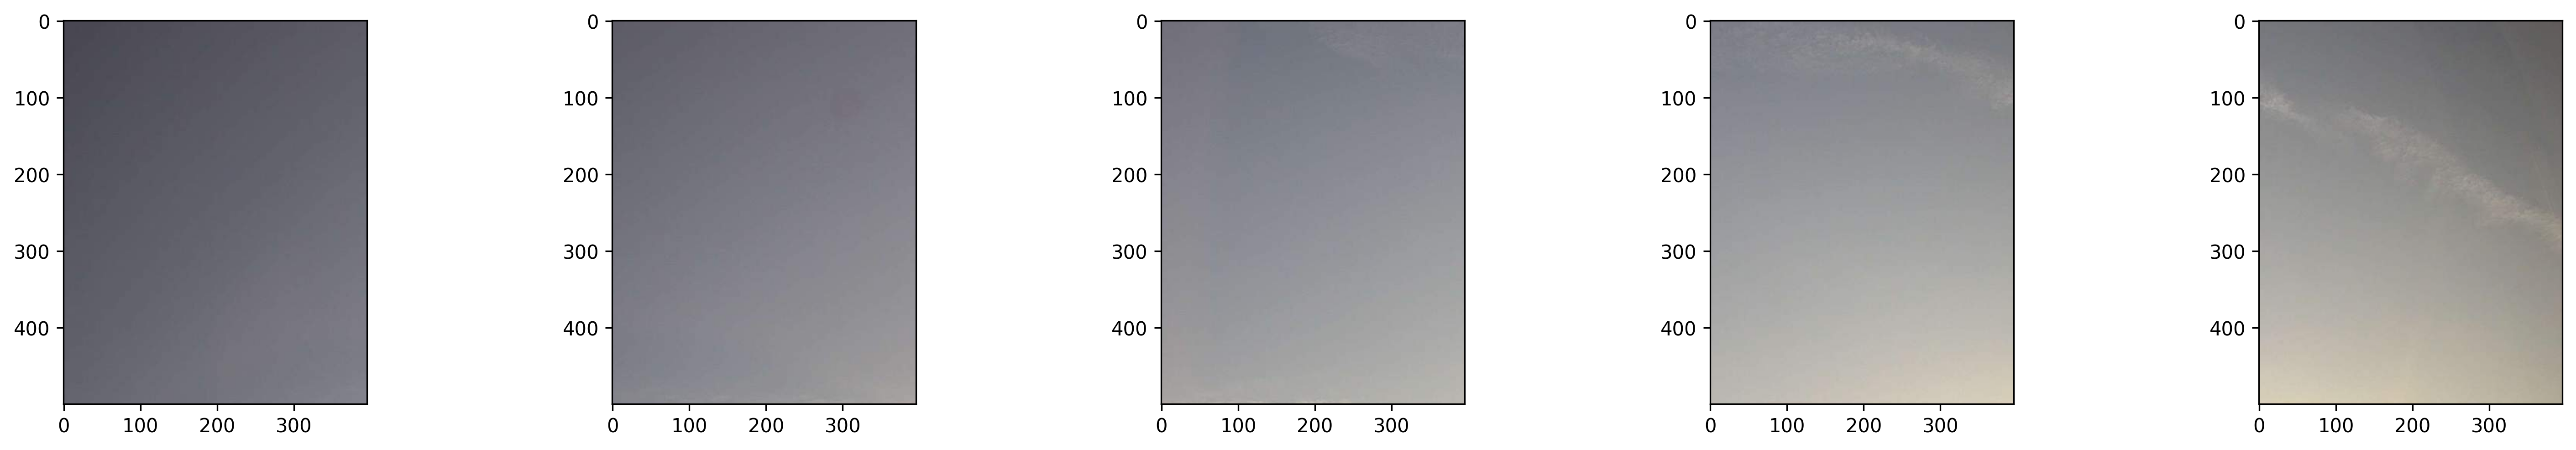

In [81]:
plt.figure(figsize=(25, 8), dpi=300)
image_list=subimages(1,5,f_data.iloc[0,-1])

for k in range(len(image_list)):
    plt.subplot(2,5,k+1)
    plt.imshow(image_list[k])
    print(image_list[k].shape)
plt.show